In [47]:
import pandas as pd
from sklearn.datasets import load_iris as lr
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVC
from matplotlib import pyplot as plt
iris = lr()

In [48]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [49]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [50]:
df = pd.DataFrame(iris.data, columns= iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [51]:
df['target'] = iris.target

In [52]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [53]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [54]:
#finding how many target value have 1
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [55]:
#generating flower name on each target value
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [56]:
%matplotlib inline

In [57]:
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


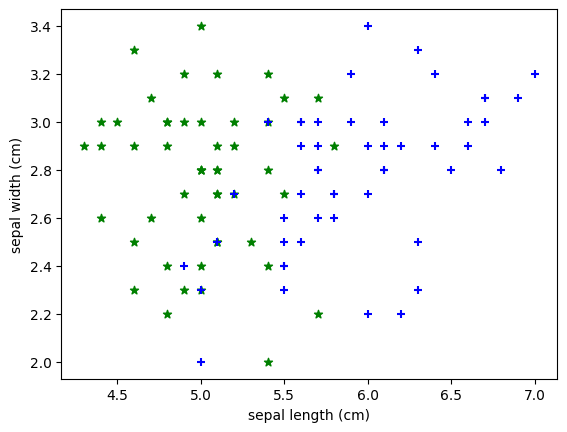

In [58]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
#giving x and y to the plot
plt.scatter(df0['sepal length (cm)'],df1['sepal width (cm)'],color = 'green',marker = '*')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color = 'blue',marker = '+')

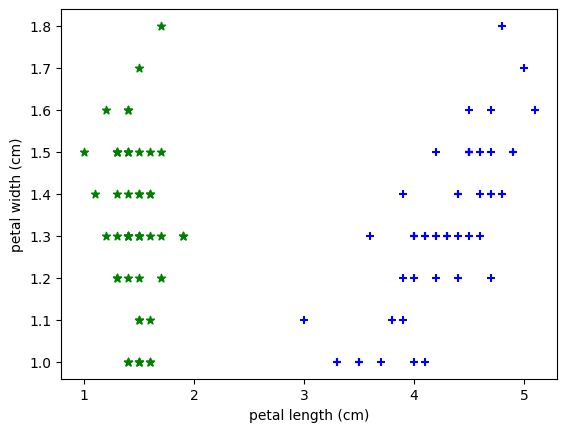

In [59]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(df0['petal length (cm)'],df1['petal width (cm)'],color = 'green',marker = '*')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color = 'blue',marker = '+')

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
x = df.drop(['target','flower_name'],axis = 'columns')
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [62]:
y = df.target

In [63]:
#using 20% of the sample for test and 80% for training
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [64]:
len(X_train)

120

In [65]:
len(X_test)

30

In [66]:
#creating svm classifier
model = SVC()

In [67]:
#training model
model.fit(X_train,y_train)

SVC()

In [81]:
model.score(X_test, y_test)

0.9333333333333333

In [85]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mae

0.06666666666666667